In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
import scipy
from scipy import interpolate
import scipy.integrate as si
import scipy.special as spec

In [2]:
h = 0.7
c =299792.458
rho_crit = 2.77536627e11 #h^2 Msun/Mpc^3
Omega_m = 0.307493988068
Omega_l = 1.-Omega_m

In [3]:
# Load data from Yoon
fname_mh125   = 'a70_HI_group_mh12.5_ngal2.dat'

#Read data
data_mh125=np.genfromtxt(fname_mh125,
                        dtype=(int,float,float,float,float, float,float,float,float, float,float,float,float, \
                               float,float,float,float, float,float,float,float,float,float,float,float),
                        names=('AGCNr','HIra','HIdec','v21','redshift','dist','w50','flux','snratio','loghimass','groupid',\
                         'gra','gdec','gz','Mhalo_L','Mhalo_M','ngal','r180L','d_A_mpc','r180_arcmin','galid','ra','dec',\
                         'z','MASS'))

In [4]:
# Load my a70 data
mydata = np.genfromtxt('../70/DATA_FULL/data_alpha_70_FULL_DATA_flux_w50.txt',
                     dtype=(float,float,float,float,float,float,float,float),
                     names=('agc','ra','dec','v50','vcmb','logMHI', 'flux', 'w50'))
print len(mydata['logMHI'])

17513


In [5]:
print 'Number of HI sources in the group catalog with M_halo>0:', len(data_mh125[np.where(data_mh125['Mhalo_L']>0.)[0]]['loghimass'])
print len(data_mh125[np.where(data_mh125['Mhalo_M']==0.)[0]]['loghimass'])
print len(data_mh125['loghimass'])

Number of HI sources in the group catalog with M_halo>0: 1437
0
1437


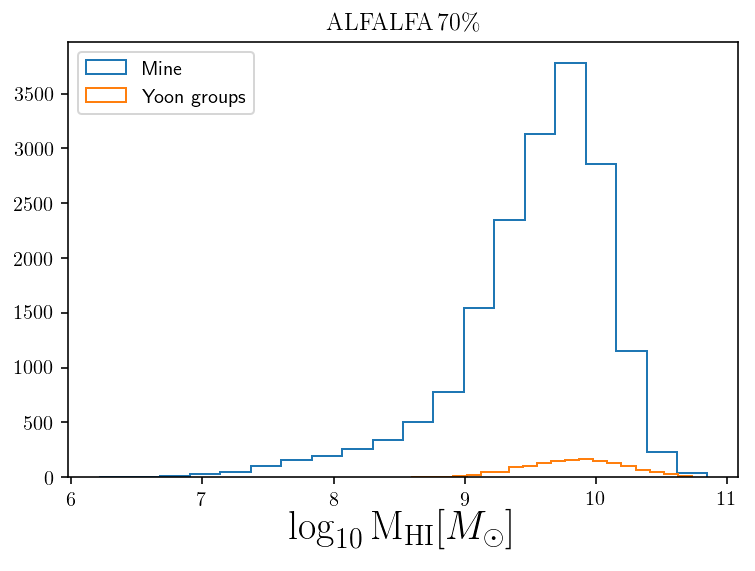

In [6]:
# Histogram of HI masses in both catalogues and in mine a70
plt.hist(mydata['logMHI'], histtype='step', bins=20, label = 'Mine')
plt.hist(data_mh125['loghimass'], histtype='step', bins=20, label = 'Yoon groups')
plt.title('${\\rm ALFALFA\,70\\%}$')
plt.xlabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)
plt.legend(loc=2)
# plt.savefig('HI_histogram_comp.pdf', bbox_inches='tight')

In [7]:
# Make one single catalogue from groups and isolated catalogues
# + 
# impose cut on v21<15000 due to RFI

yoon_all = data_mh125[np.where((data_mh125['Mhalo_L']>9) & (data_mh125['v21']<15000.))[0]]
print len(yoon_all)

1387


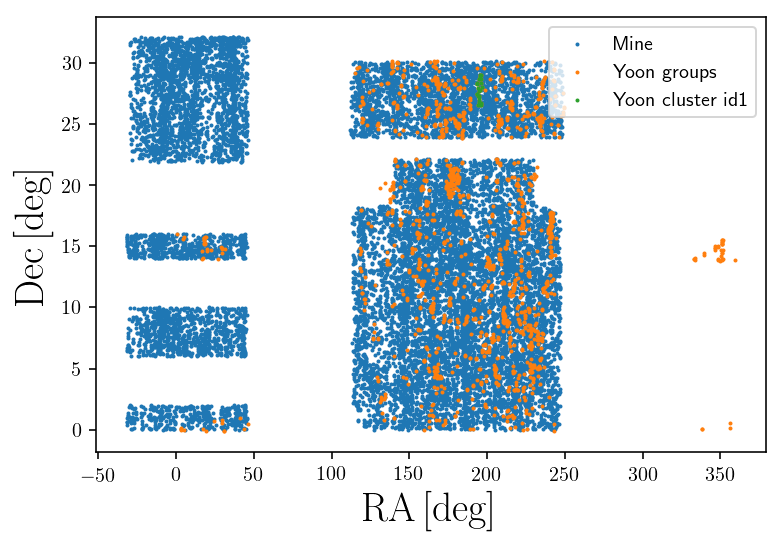

In [8]:
# Check the sky coverage of
plt.scatter(mydata['ra'], mydata['dec'], s=1, label = 'Mine')
plt.scatter(data_mh125['HIra'], data_mh125['HIdec'], s=1, label = 'Yoon groups')
plt.scatter([data_mh125[np.where(data_mh125['groupid']==1)[0]]['HIra']],\
            [data_mh125[np.where(data_mh125['groupid']==1)[0]]['HIdec']], s=1, label = 'Yoon cluster id1')
plt.legend(loc=1)
plt.xlabel('${\\rm RA\,[deg]}$', fontsize=20)
plt.ylabel('${\\rm Dec\,[deg]}$', fontsize=20)

Range of halo masses in log10(M_h[M_\odot/h]):  12.5002 15.0375


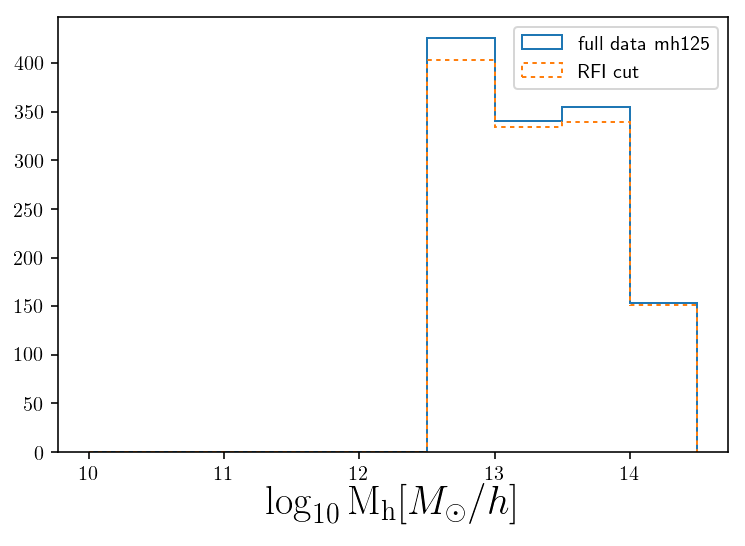

In [9]:
# Histogram of halo masses
plt.hist(data_mh125['Mhalo_L'], bins=np.arange(10,15,0.5), histtype='step', label = 'full data mh125')
plt.hist(yoon_all['Mhalo_L'], bins=np.arange(10,15,0.5), histtype='step', linestyle='dotted', label = 'RFI cut')
plt.xlabel('$\\log_{10}{\\rm M_h}[M_\\odot/h]$', fontsize=20)
plt.legend(loc=0)
print 'Range of halo masses in log10(M_h[M_\odot/h]): ', np.min(yoon_all['Mhalo_L']), np.max(yoon_all['Mhalo_L'])

In [10]:
print 'fsky of a70: ', 4529./(4.*np.pi*(180./np.pi)**2)

# print 'fsky of Yoon all (estimated): ', 3612./(4.*np.pi*(180./np.pi)**2)

print 'rough total fsky of all clusters: ', np.sum((yoon_all['r180L']/yoon_all['dist'])**2/(4.*np.pi))

# fsky = 3612./(4.*np.pi*(180./np.pi)**2)
# fsky *= 1e-2
# fsky = np.sum((data_mh125['r180L']/data_mh125['dist'])**2/(4.*np.pi))

fsky of a70:  0.109786058087
rough total fsky of all clusters:  0.0145472219191


-2000.2 17912.4
701.056886515 14998.1883027
374.0 15276.0


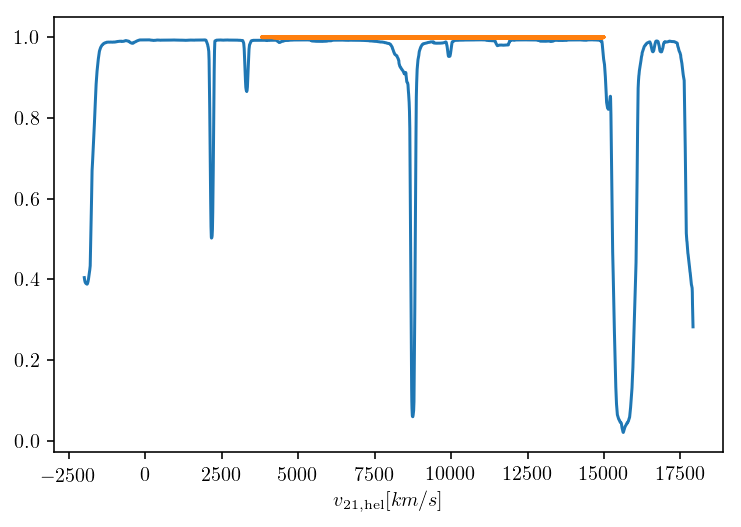

In [11]:
# RFI completeness table and interpolation
vhrfi,complrfi = np.loadtxt('../70/rfi_completeness.txt',unpack=True, delimiter=',')
plt.plot(vhrfi,complrfi)
int_complete = scipy.interpolate.interp1d(vhrfi, complrfi, kind='linear')
print vhrfi.min(), vhrfi.max()
plt.plot(yoon_all['v21'], np.ones_like(yoon_all['v21']), linewidth=2)
plt.xlabel('$v_{21,\\rm hel}[km/s]$')
print np.min(mydata['vcmb']), np.max(mydata['vcmb']) 
print np.min(mydata['v50']), np.max(mydata['v50']) 

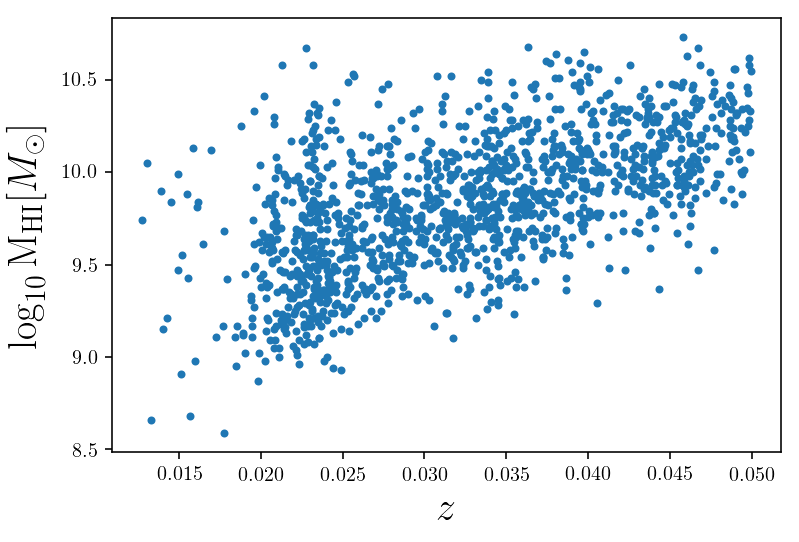

In [12]:
plt.plot(yoon_all['redshift'], yoon_all['loghimass'], '.')
plt.xlabel('$z$', fontsize=20)
plt.ylabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)

In [13]:
# HI massses of a particluar cluster:
print yoon_all[np.where(yoon_all['groupid']==1)]['loghimass']

[  9.48  10.19   8.93   9.14   9.53   9.39   9.65   9.98   9.64   9.32
   9.4    9.1    9.08   9.45   9.13   9.29   9.15   8.59   9.28   8.96
   8.94]


15.0375
114.4
0.0257833333333


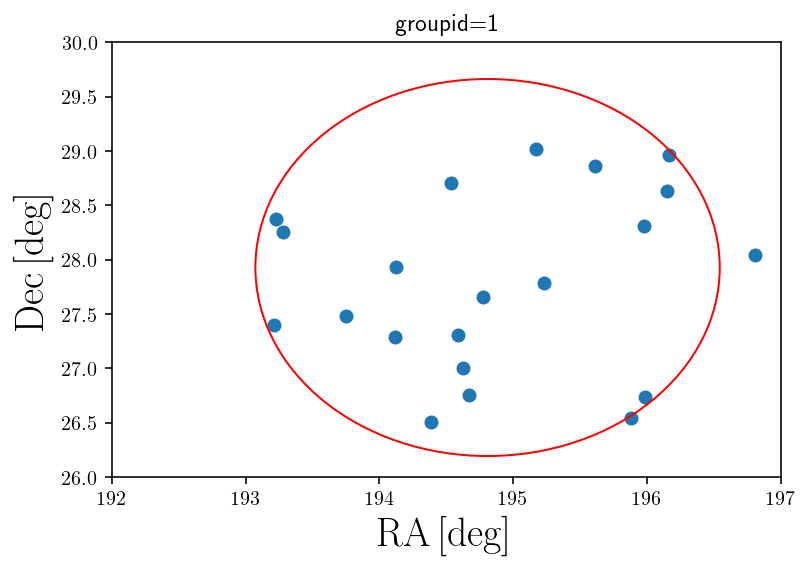

In [14]:
import matplotlib.pyplot as pyplt
circle1 = pyplt.Circle((yoon_all[np.where(yoon_all['groupid']==1)]['gra'][0], \
                       yoon_all[np.where(yoon_all['groupid']==1)]['gdec'][0]), yoon_all[np.where(yoon_all['groupid']==1)[0]]['r180L'][0]\
                       /yoon_all[np.where(yoon_all['groupid']==1)[0]]['dist'][0]\
                       *180./np.pi, color='r', fill=False)
fig, ax = plt.subplots() 
ax.scatter(yoon_all[np.where(yoon_all['groupid']==1)]['HIra'],yoon_all[np.where(yoon_all['groupid']==1)]['HIdec'])
ax.add_artist(circle1)
ax.set_ylim(26,30)
ax.set_xlim(192,197)
print yoon_all[np.where(yoon_all['groupid']==1)]['Mhalo_L'][0]
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['dist'][0]
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['redshift'][0]
ax.set_title('groupid=1')
ax.set_xlabel('${\\rm RA\,[deg]}$', fontsize=20)
ax.set_ylabel('${\\rm Dec\,[deg]}$', fontsize=20)

In [15]:
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['r180L'][0]\
                       /yoon_all[np.where(yoon_all['groupid']==1)[0]]['dist'][0]\
                       *180./np.pi

1.73376236774


15.0375
114.4
0.0257833333333


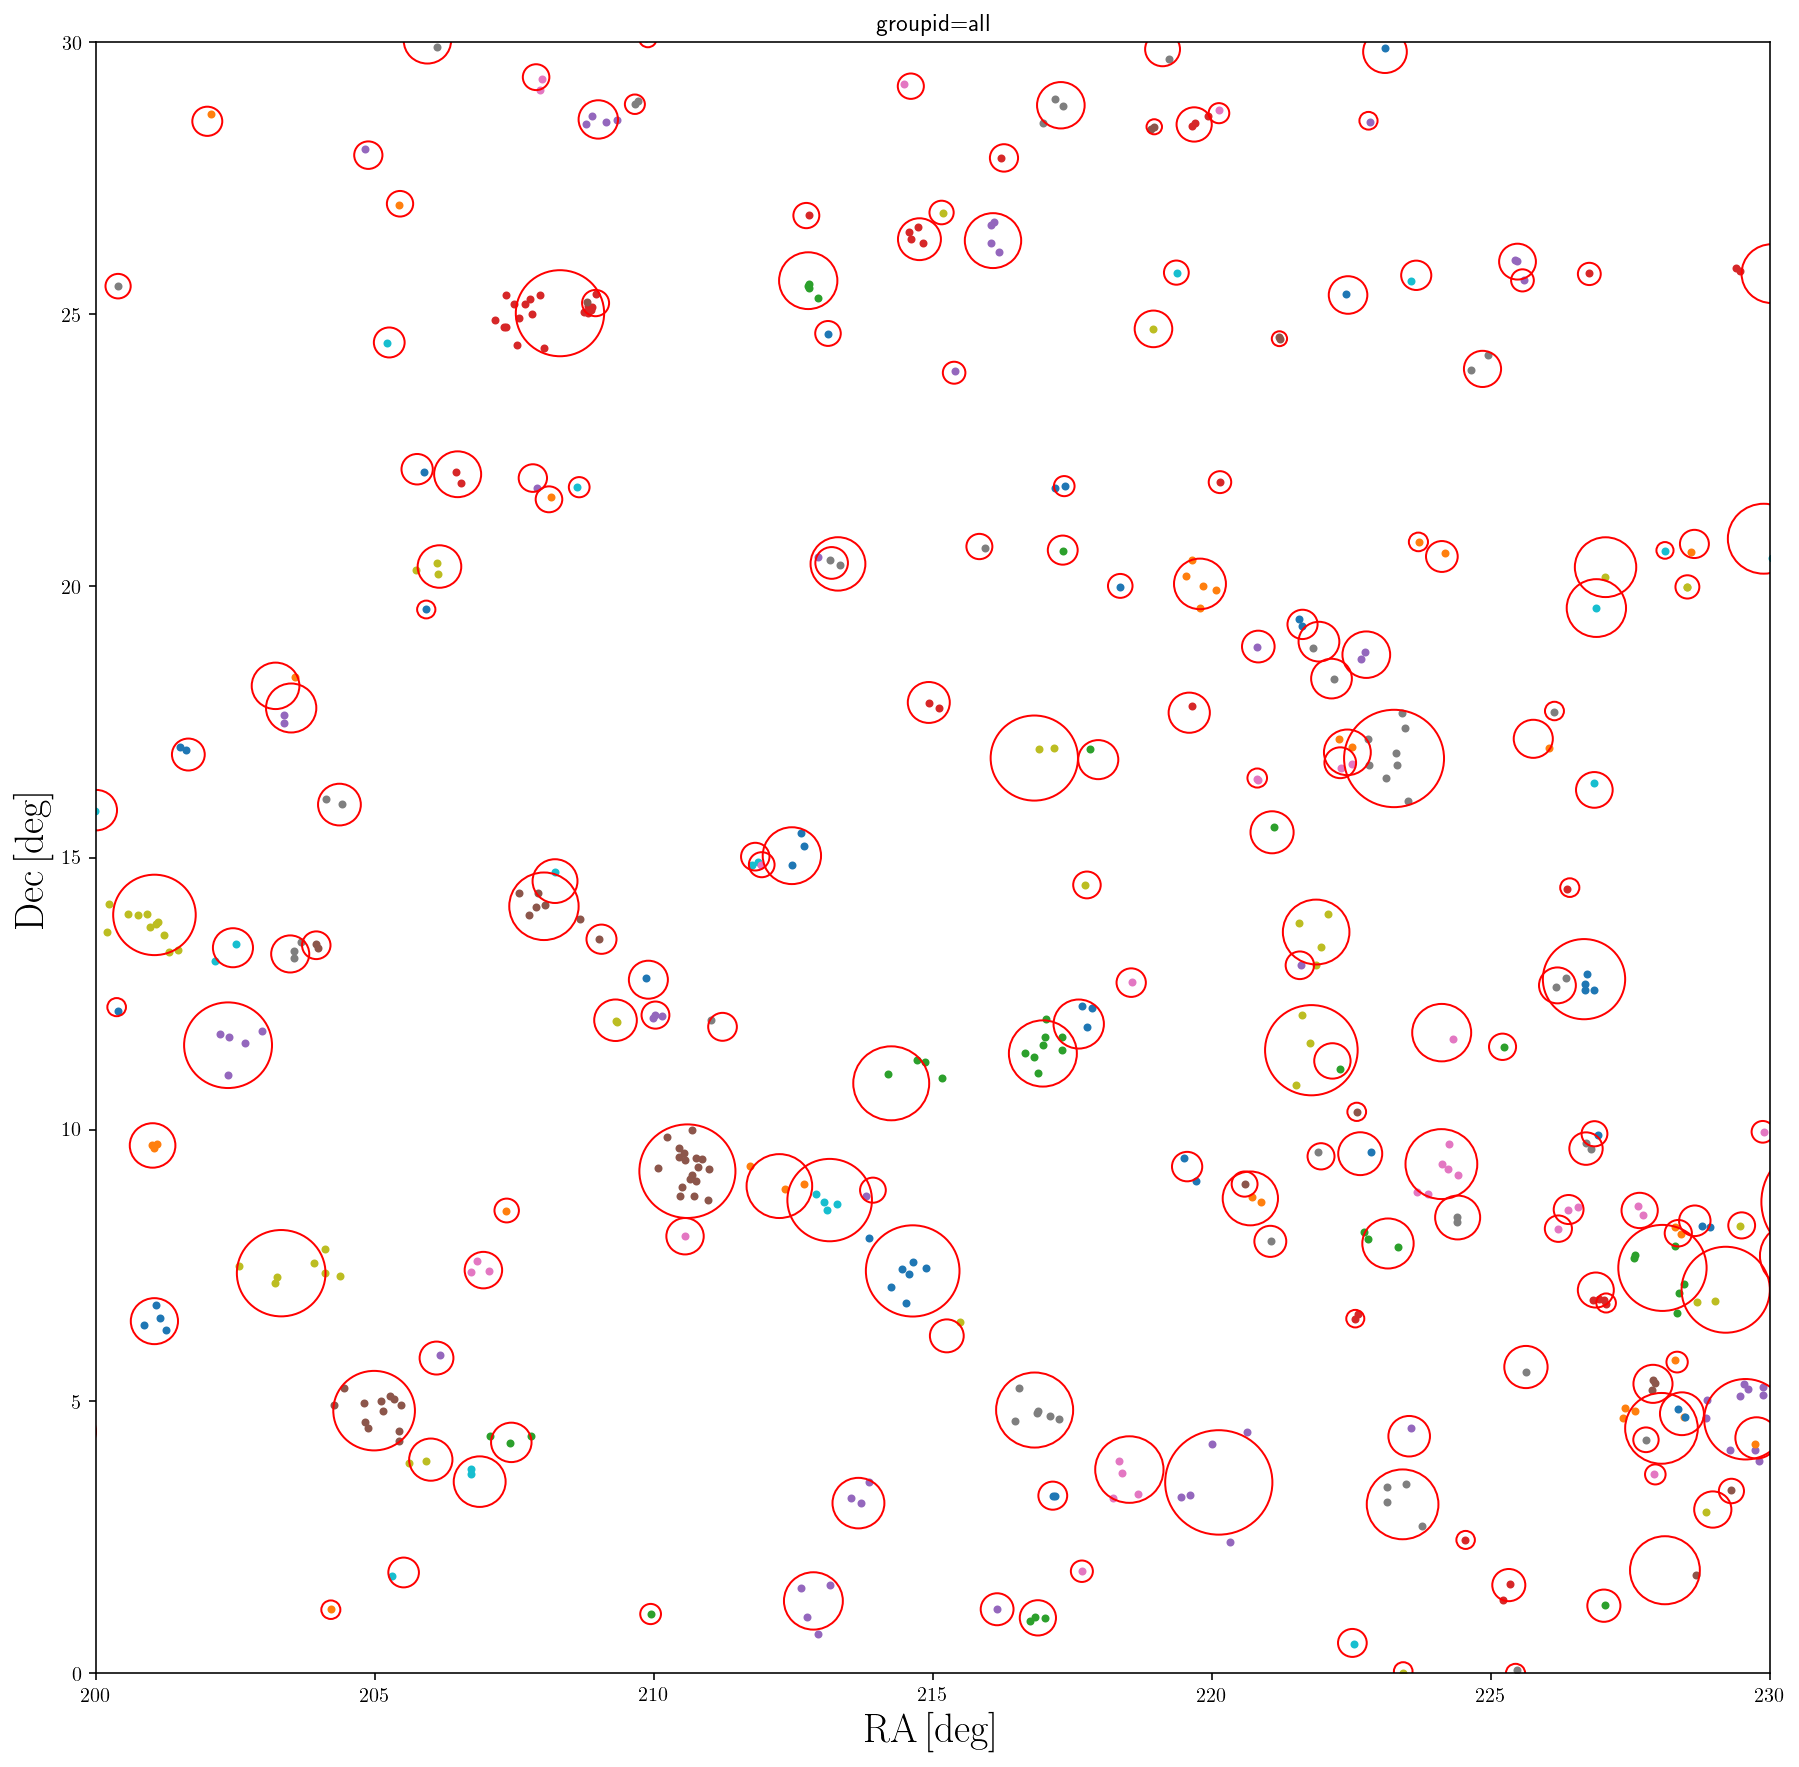

In [17]:
fig, ax = plt.subplots(figsize=(15,15)) 
for ig, gi in enumerate(set(yoon_all['groupid'])):
    circle = pyplt.Circle((yoon_all[np.where(yoon_all['groupid']==gi)]['gra'][0], \
                       yoon_all[np.where(yoon_all['groupid']==gi)]['gdec'][0]), \
                          yoon_all[np.where(yoon_all['groupid']==gi)[0]]['r180L'][0]\
                       /yoon_all[np.where(yoon_all['groupid']==gi)[0]]['dist'][0]\
                       *180./np.pi, color='r', fill=False)
    ax.scatter(yoon_all[np.where(yoon_all['groupid']==gi)]['HIra'],yoon_all[np.where(yoon_all['groupid']==gi)]['HIdec'], marker='.')
    ax.add_artist(circle)
ax.set_ylim(0,30)
ax.set_xlim(200,230)
print yoon_all[np.where(yoon_all['groupid']==1)]['Mhalo_L'][0]
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['dist'][0]
print yoon_all[np.where(yoon_all['groupid']==1)[0]]['redshift'][0]
ax.set_title('groupid=all')
ax.set_xlabel('${\\rm RA\,[deg]}$', fontsize=20)
ax.set_ylabel('${\\rm Dec\,[deg]}$', fontsize=20)

In [18]:
def fsky_clusters(yoon):
    Np  = 500000
    random_array = np.random.rand(Np,2)
    phi = 2.*np.pi*random_array[:,0]
    theta = np.arccos(-1.+2.*random_array[:,1])
    rRA = phi*180./np.pi
    rdec= 90.- theta*180./np.pi
    index_random_inside = np.ones_like(rRA)
    for ig, gi in enumerate(set(yoon['groupid'])):
        radius = yoon[np.where(yoon['groupid']==gi)[0]]['r180L'][0]\
                       /yoon_all[np.where(yoon['groupid']==gi)[0]]['dist'][0]\
                       *180./np.pi
        center_ra = yoon[np.where(yoon['groupid']==gi)[0]]['gra'][0]
        center_dec = yoon[np.where(yoon['groupid']==gi)[0]]['gdec'][0]
        index_random_inside[np.where(np.sqrt((rRA-center_ra)**2+(rdec-center_dec)**2)<=radius)[0]] = 0.
    ratio = (np.where(index_random_inside==0)[0]).size*1./len(index_random_inside)
    del index_random_inside, random_array, rRA, rdec, theta, phi
    return ratio

fsky_all_clusters = fsky_clusters(yoon_all)
print fsky_all_clusters

0.006788


Range of halo masses in log10(M_h[M_\odot/h]):  12.5002 15.0375
[ 12.4         12.78571429  13.17142857  13.55714286  13.94285714
  14.32857143  14.71428571  15.1       ] 8
[ 12.59285714  12.97857143  13.36428571  13.75        14.13571429
  14.52142857  14.90714286] 7
0.385714285714
[  3.91613038e+12   9.51856387e+12   2.31358636e+13   5.62341325e+13
   1.36682932e+14   3.32222140e+14   8.07500606e+14]


Range of HI masses in log10(M_HI[M_\odot/h]):  8.59 10.73
[  8.49   8.75   9.01   9.27   9.53   9.79  10.05  10.31  10.57  10.83] 8.59 10.73
[  8.62   8.88   9.14   9.4    9.66   9.92  10.18  10.44  10.7 ]
0.26
0.26 0.26
8.59


/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


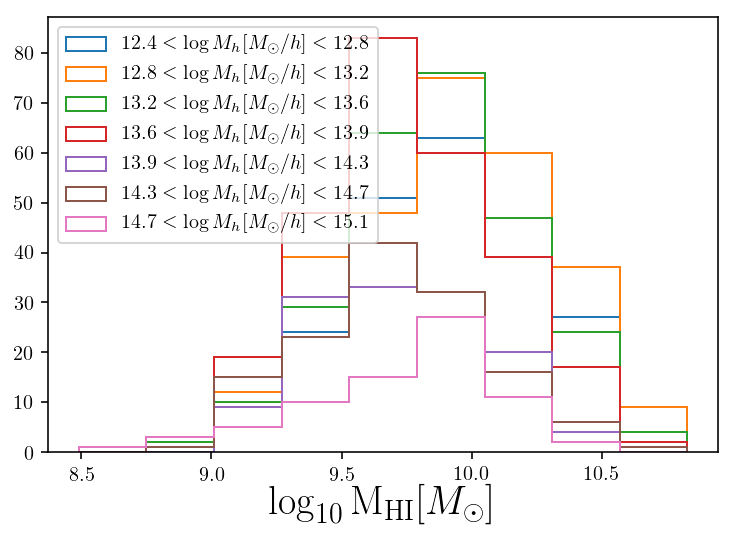

In [19]:
print 'Range of halo masses in log10(M_h[M_\odot/h]): ', np.min(yoon_all['Mhalo_L']), np.max(yoon_all['Mhalo_L'])
halo_bins = np.linspace(12.4,15.1,8)
print halo_bins, len(halo_bins)
halo_bins_c = 0.5*(halo_bins[1:]+halo_bins[:-1]) 
print halo_bins_c, len(halo_bins_c)
dhalo_bin = np.diff(halo_bins)[0]
print dhalo_bin
print 10**halo_bins_c

print '\n'

print 'Range of HI masses in log10(M_HI[M_\odot/h]): ', np.min(yoon_all['loghimass']), np.max(yoon_all['loghimass'])
num_HI_bins = 10.
HI_bins = np.linspace(np.min(yoon_all['loghimass'])-0.1, np.max(yoon_all['loghimass'])+0.1, num_HI_bins)
print HI_bins, np.min(yoon_all['loghimass']), np.max(yoon_all['loghimass'])

HI_bins_c = 0.5*(HI_bins[1:]+HI_bins[:-1]) 
print HI_bins_c
print np.diff(HI_bins)[0]
dHI_bin = np.diff(HI_bins)[0]
print dHI_bin, np.diff(HI_bins)[0]

for ih, hi in enumerate(halo_bins_c):
    plt.hist(yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[ih]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[ih]+dhalo_bin/2.)))]['loghimass'], \
                         bins=HI_bins, histtype='step', \
                         label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[ih], halo_bins[ih+1]))
plt.legend(loc=2)
plt.xlabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)
print yoon_all['loghimass'].min()

In [20]:
yoon_all_1 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[0]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[0]+dhalo_bin/2.)))]
yoon_all_2 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[1]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[1]+dhalo_bin/2.)))]
yoon_all_3 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[2]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[2]+dhalo_bin/2.)))]
yoon_all_4 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[3]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[3]+dhalo_bin/2.)))]
yoon_all_5 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[4]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[4]+dhalo_bin/2.)))]
yoon_all_6 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[5]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[5]+dhalo_bin/2.)))]
yoon_all_7 = yoon_all[np.where((yoon_all['Mhalo_L']>(halo_bins_c[6]-dhalo_bin/2.))\
                               &(yoon_all['Mhalo_L']<=(halo_bins_c[6]+dhalo_bin/2.)))]

240
283
256
269
129
136
74


(array([  1.,   3.,   5.,  10.,  15.,  27.,  11.,   2.,   0.]),
 array([  8.49,   8.75,   9.01,   9.27,   9.53,   9.79,  10.05,  10.31,
         10.57,  10.83]),
 <a list of 9 Patch objects>)

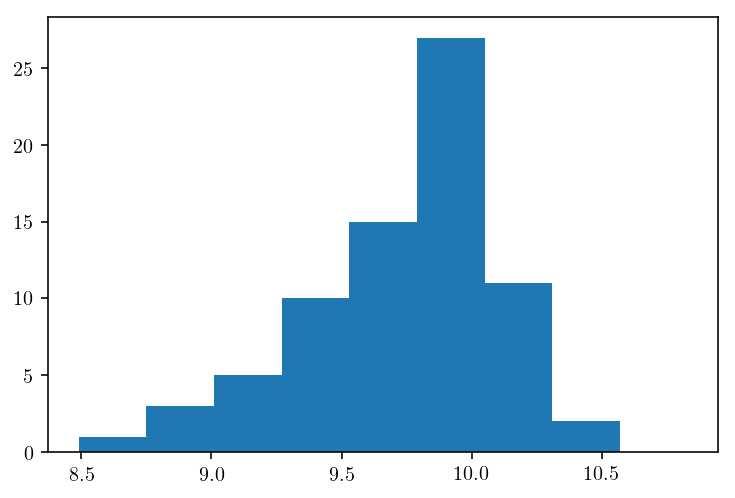

In [21]:
print yoon_all_1['loghimass'].size
print yoon_all_2['loghimass'].size
print yoon_all_3['loghimass'].size
print yoon_all_4['loghimass'].size
print yoon_all_5['loghimass'].size
print yoon_all_6['loghimass'].size
print yoon_all_7['loghimass'].size
plt.hist(yoon_all_7['loghimass'], bins=HI_bins)

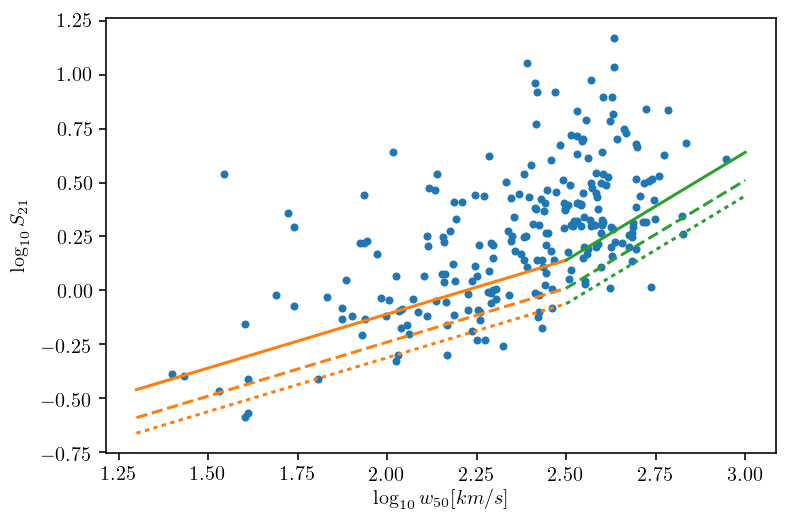

In [22]:
plt.plot(np.log10(yoon_all_1['w50']), np.log10(yoon_all_1['flux']), '.')
help_logw_arr_1 = np.linspace(1.3,2.5,101)
help_logw_arr_2 = np.linspace(2.5,3,101)
plt.plot(help_logw_arr_1,help_logw_arr_1*0.5-1.11, 'C1')
plt.plot(help_logw_arr_1,help_logw_arr_1*0.5-1.11-0.130, 'C1--')
plt.plot(help_logw_arr_1,help_logw_arr_1*0.5-1.11-0.202, 'C1:')
plt.plot(help_logw_arr_2,help_logw_arr_2-2.36, 'C2')
plt.plot(help_logw_arr_2,help_logw_arr_2-2.36-0.130, 'C2--')
plt.plot(help_logw_arr_2,help_logw_arr_2-2.36-0.202, 'C2:')
plt.xlabel('$\\log_{10}w_{50}[km/s]$')
plt.ylabel('$\\log_{10}S_{21}$')

In [23]:
def log_HIMF_halo_bin(yoon):
    Distances_25 = np.zeros_like(yoon['loghimass'])
    Distances_real = np.zeros_like(Distances_25)
    for im, mi in enumerate(yoon['loghimass']):
        # since there are Code2 objects too, we use 6 & 7 eq. from Haynes+2011
        if yoon['w50'][im]<2.5:
            Distances_25[im] = np.sqrt(10**mi/(2.356e5*(yoon['w50'][im]**0.5/10**(1.11+0.130))))
        else:
            Distances_25[im] = np.sqrt(10**mi/(2.356e5*(yoon['w50'][im]/10**(2.36+0.130))))
        Distances_real[im]   = np.sqrt(10**mi/(2.356e5*yoon['flux'][im]))
        
#     fsky_halo = np.sum((0.7*yoon['r180L']/yoon['dist'])**2/(4.*np.pi))
    fsky_halo = fsky_clusters(yoon)
#     fsky_halo = fsky_all_clusters
#     fsky_halo = 0.01
    
    Volumes_25   = fsky_halo*4.*np.pi/3.*Distances_25**3
    Volumes_real = fsky_halo*4.*np.pi/3.*Distances_real**3*int_complete(yoon['v21'])
    Volumes_25_rfi = Volumes_25*int_complete(yoon['v21'])

    Phi_25 = np.zeros_like(HI_bins_c)
    Phi_rfi_25 = np.zeros_like(HI_bins_c)
    dPhi_25 = np.zeros_like(HI_bins_c)
    dPhi_rfi_25 = np.zeros_like(HI_bins_c)
    
    nums_00, bins_00 = np.histogram(yoon['loghimass'], bins=HI_bins)
    
    for ib, bi in enumerate(HI_bins_c):
        Phi_25[ib] = np.sum(1./Volumes_25[np.where((yoon['loghimass']>(bi-dHI_bin/2.))&(yoon['loghimass']<=(bi+dHI_bin/2.)))[0]])/dHI_bin
        dPhi_25[ib] = Phi_25[ib]/np.sqrt(nums_00[ib])
        Phi_rfi_25[ib] = np.sum(1./Volumes_25_rfi[np.where((yoon['loghimass']>(bi-dHI_bin/2.))&(yoon['loghimass']<=(bi+dHI_bin/2.)))[0]])/dHI_bin
        dPhi_rfi_25[ib] = Phi_rfi_25[ib]/np.sqrt(nums_00[ib])
    return [HI_bins_c[Phi_rfi_25>0], np.log10(Phi_rfi_25[Phi_rfi_25>0]), \
            dPhi_rfi_25[Phi_rfi_25>0]/Phi_rfi_25[Phi_rfi_25>0]]
#     return [HI_bins_c[Phi_25>0], np.log10(Phi_25[Phi_25>0]/np.diff(HI_bins_c)[0]), dPhi_rfi_25[Phi_25>0]/Phi_rfi_25[Phi_25>0]]
#     return [HI_bins_c, np.log10(Phi_25/np.diff(HI_bins_c)[0]), dPhi_rfi_25/Phi_rfi_25]

print log_HIMF_halo_bin(yoon_all_2)

[array([  8.62,   8.88,   9.14,   9.4 ,   9.66,   9.92,  10.18,  10.44,
        10.7 ]), array([-3.58323996, -2.90749295, -2.42058671, -2.07356376, -2.11087251,
       -2.15716793, -2.37320027, -3.09255893, -3.88359544]), array([ 1.        ,  0.70710678,  0.28867513,  0.16012815,  0.14433757,
        0.11547005,  0.12909944,  0.16439899,  0.33333333])]


In [24]:
print np.sum((yoon_all['r180L']/yoon_all['dist'])**2/(4.*np.pi))
print fsky_all_clusters/np.sum((yoon_all['r180L']/yoon_all['dist'])**2/(4.*np.pi))
# print fsky_clusters(yoon_all), fsky_clusters(yoon_all_1), fsky_clusters(yoon_all_2), fsky_clusters(yoon_all_3),\
# fsky_clusters(yoon_all_4), fsky_clusters(yoon_all_5), fsky_clusters(yoon_all_6), fsky_clusters(yoon_all_7)

0.0145472219191
0.466618302639


/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


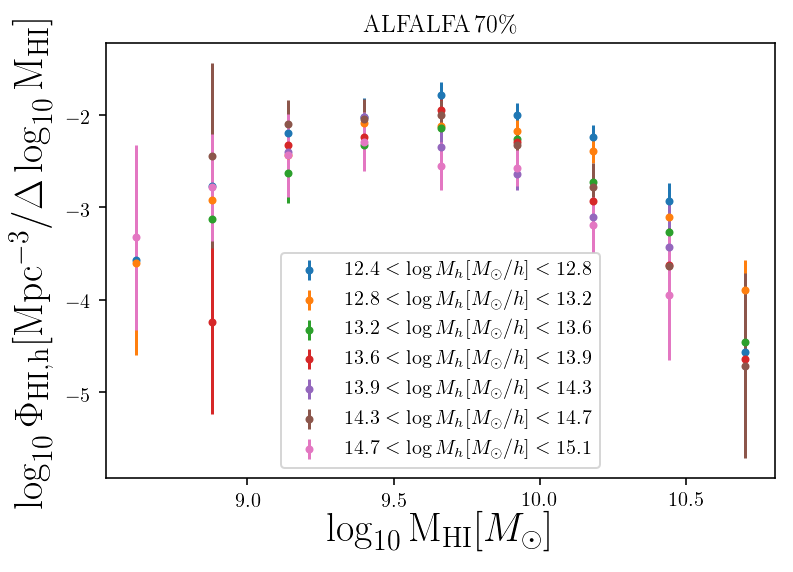

In [25]:
plt.errorbar(log_HIMF_halo_bin(yoon_all_1)[0],log_HIMF_halo_bin(yoon_all_1)[1], yerr=log_HIMF_halo_bin(yoon_all_1)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[0], halo_bins[1]))
plt.errorbar(log_HIMF_halo_bin(yoon_all_2)[0],log_HIMF_halo_bin(yoon_all_2)[1], yerr=log_HIMF_halo_bin(yoon_all_2)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[1], halo_bins[2]))
plt.errorbar(log_HIMF_halo_bin(yoon_all_3)[0],log_HIMF_halo_bin(yoon_all_3)[1], yerr=log_HIMF_halo_bin(yoon_all_3)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[2], halo_bins[3]))
plt.errorbar(log_HIMF_halo_bin(yoon_all_4)[0],log_HIMF_halo_bin(yoon_all_4)[1], yerr=log_HIMF_halo_bin(yoon_all_4)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[3], halo_bins[4]))
plt.errorbar(log_HIMF_halo_bin(yoon_all_5)[0],log_HIMF_halo_bin(yoon_all_5)[1], yerr=log_HIMF_halo_bin(yoon_all_5)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[4], halo_bins[5]))
plt.errorbar(log_HIMF_halo_bin(yoon_all_6)[0],log_HIMF_halo_bin(yoon_all_6)[1], yerr=log_HIMF_halo_bin(yoon_all_6)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[5], halo_bins[6]))
plt.errorbar(log_HIMF_halo_bin(yoon_all_7)[0],log_HIMF_halo_bin(yoon_all_7)[1], yerr=log_HIMF_halo_bin(yoon_all_7)[2], fmt='.', label = '${0:.1f}<\\log M_h[M_\\odot/h] < {1:.1f}$'.format(halo_bins[6], halo_bins[7]))

plt.xlabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot]$', fontsize=20)
plt.ylabel('$\\log_{10}\\Phi_{\\rm HI,h}[{\\rm Mpc^{-3}}/\\Delta \\log_{10}{\\rm M_{HI}}]$', fontsize=20)
plt.title('${\\rm ALFALFA\,70\\%}$')
plt.legend(loc=0)

In [26]:
MHI_arr = np.zeros_like(halo_bins_c)

MHI_arr[0] = np.sum(10**(log_HIMF_halo_bin(yoon_all_1)[1])*10**(log_HIMF_halo_bin(yoon_all_1)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_1['r180L'])**3/h**3
    
MHI_arr[1] = np.sum(10**(log_HIMF_halo_bin(yoon_all_2)[1])*10**(log_HIMF_halo_bin(yoon_all_2)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_2['r180L'])**3/h**3
    
MHI_arr[2] = np.sum(10**(log_HIMF_halo_bin(yoon_all_3)[1])*10**(log_HIMF_halo_bin(yoon_all_3)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_3['r180L'])**3/h**3
    
MHI_arr[3] = np.sum(10**(log_HIMF_halo_bin(yoon_all_4)[1])*10**(log_HIMF_halo_bin(yoon_all_4)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_4['r180L'])**3/h**3
    
MHI_arr[4] = np.sum(10**(log_HIMF_halo_bin(yoon_all_5)[1])*10**(log_HIMF_halo_bin(yoon_all_5)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_5['r180L'])**3/h**3
    
MHI_arr[5] = np.sum(10**(log_HIMF_halo_bin(yoon_all_6)[1])*10**(log_HIMF_halo_bin(yoon_all_6)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_6['r180L'])**3/h**3
        
MHI_arr[6] = np.sum(10**(log_HIMF_halo_bin(yoon_all_7)[1])*10**(log_HIMF_halo_bin(yoon_all_7)[0]))*\
        4.*np.pi/3.*np.mean(yoon_all_7['r180L'])**3/h**3
    
print np.log10(MHI_arr)
print np.sum(10**(log_HIMF_halo_bin(yoon_all_6)[1])*10**(log_HIMF_halo_bin(yoon_all_6)[0]))/1e9

/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/andrejobuljen/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


[  8.7909812    8.95821764   9.18847638   9.56769905   9.72392315
  10.40208641  10.37597929]
0.141930531313


In [27]:
# dMHI_arr = np.zeros_like(halo_bins_c)

# dMHI_arr[0] = np.sum(log_HIMF_halo_bin(yoon_all_1)[2]*10**(log_HIMF_halo_bin(yoon_all_1)[0]))*\
#         4.*np.pi/3.*np.mean(yoon_all_1['r180L'])**3/h**3
    
# dMHI_arr[1] = np.sum(log_HIMF_halo_bin(yoon_all_2)[2]*10**(log_HIMF_halo_bin(yoon_all_2)[0]))*\
#         4.*np.pi/3.*np.mean(yoon_all_2['r180L'])**3/h**3
    
# # MHI_arr[2] = np.sum(10**(log_HIMF_halo_bin(yoon_all_3)[1])*10**(log_HIMF_halo_bin(yoon_all_3)[0]))*\
# #         4.*np.pi/3.*np.mean(yoon_all_3['r180L'])**3/h**3
    
# # MHI_arr[3] = np.sum(10**(log_HIMF_halo_bin(yoon_all_4)[1])*10**(log_HIMF_halo_bin(yoon_all_4)[0]))*\
# #         4.*np.pi/3.*np.mean(yoon_all_4['r180L'])**3/h**3
    
# # MHI_arr[4] = np.sum(10**(log_HIMF_halo_bin(yoon_all_5)[1])*10**(log_HIMF_halo_bin(yoon_all_5)[0]))*\
# #         4.*np.pi/3.*np.mean(yoon_all_5['r180L'])**3/h**3
    
# # MHI_arr[5] = np.sum(10**(log_HIMF_halo_bin(yoon_all_6)[1])*10**(log_HIMF_halo_bin(yoon_all_6)[0]))*\
# #         4.*np.pi/3.*np.mean(yoon_all_6['r180L'])**3/h**3
        
# # MHI_arr[6] = np.sum(10**(log_HIMF_halo_bin(yoon_all_7)[1])*10**(log_HIMF_halo_bin(yoon_all_7)[0]))*\
# #         4.*np.pi/3.*np.mean(yoon_all_7['r180L'])**3/h**3
    
# print np.log10(MHI_arr[1]), np.log10(dMHI_arr[2])
# # print log_HIMF_halo_bin(yoon_all_1)[2], log_HIMF_halo_bin(yoon_all_1)[1]
# # print np.sum(10**(log_HIMF_halo_bin(yoon_all_6)[1])*10**(log_HIMF_halo_bin(yoon_all_6)[0]))/1e9

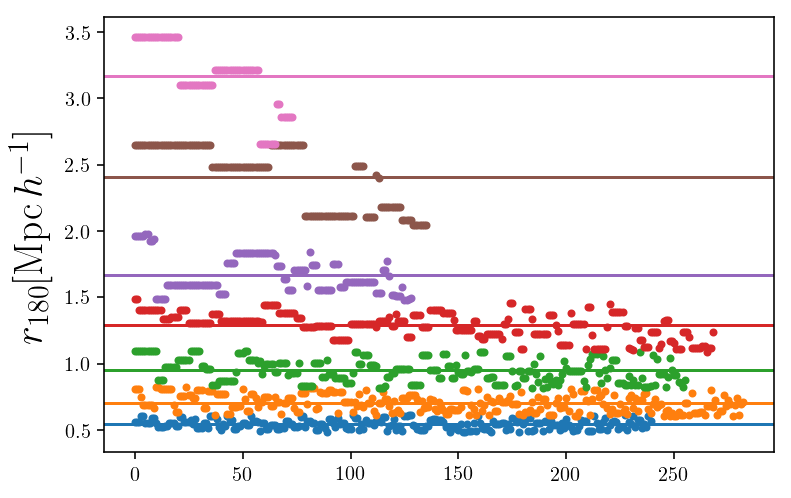

In [28]:
plt.plot(yoon_all_1['r180L'], '.')
plt.axhline(np.mean(yoon_all_1['r180L']), color = 'C0')
plt.plot(yoon_all_2['r180L'], '.')
plt.axhline(np.mean(yoon_all_2['r180L']), color = 'C1')
plt.plot(yoon_all_3['r180L'], '.')
plt.axhline(np.mean(yoon_all_3['r180L']), color = 'C2')
plt.plot(yoon_all_4['r180L'], '.')
plt.axhline(np.mean(yoon_all_4['r180L']), color = 'C3')
plt.plot(yoon_all_5['r180L'], '.')
plt.axhline(np.mean(yoon_all_5['r180L']), color = 'C4')
plt.plot(yoon_all_6['r180L'], '.')
plt.axhline(np.mean(yoon_all_6['r180L']), color = 'C5')
plt.plot(yoon_all_7['r180L'], '.')
plt.axhline(np.mean(yoon_all_7['r180L']), color = 'C6')
plt.ylabel('$r_{180}[{\\rm Mpc}\,h^{-1}]$', fontsize=20)

In [29]:
new_data_mhi = np.zeros(len(set(yoon_all['groupid'])))
new_data_mh  = np.zeros(len(set(yoon_all['groupid'])))

for i,gi in enumerate(set(yoon_all['groupid'])):
    new_data_mhi[i] = np.log10(np.sum(10**(yoon_all['loghimass'][yoon_all['groupid']==int(gi)])))
    new_data_mh[i]  = yoon_all['Mhalo_L'][yoon_all['groupid']==int(gi)][0]

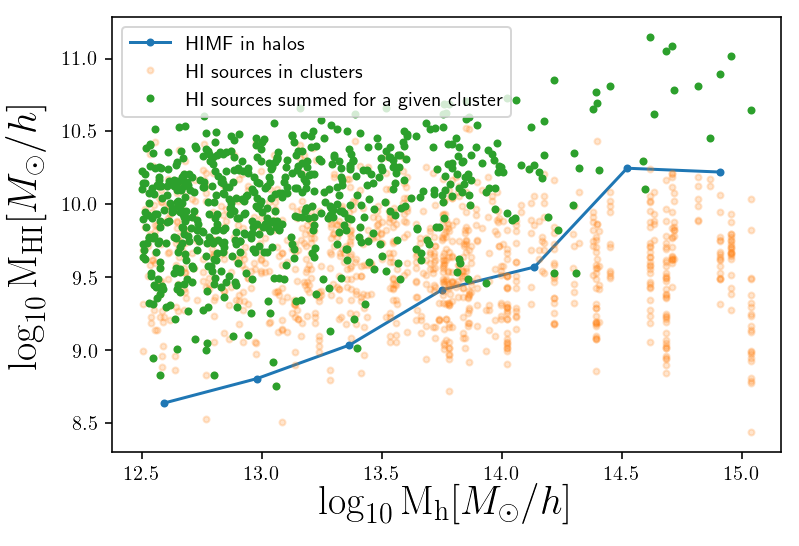

In [30]:
plt.plot(halo_bins_c, np.log10(MHI_arr*h), '.-', label = 'HIMF in halos')
plt.plot(yoon_all['Mhalo_L'], yoon_all['loghimass'] + np.log10(h), '.', alpha=0.2, label = 'HI sources in clusters')
plt.plot(new_data_mh, new_data_mhi+np.log10(h), '.', label = 'HI sources summed for a given cluster' )
plt.xlabel('$\\log_{10}{\\rm M_h}[M_\\odot/h]$', fontsize=20)
plt.ylabel('$\\log_{10}{\\rm M_{HI}}[M_\\odot/h]$', fontsize=20)
plt.legend(loc=0)
plt.savefig('MHI_Mh_relation_HIMF_halos_fsky_clusters.pdf', bbox_inches='tight')

In [ ]:
# #Define a redshift array:
# z_nu = np.arange(0,6,0.1)
# path = '../HOD/'
# Mtable, nutable = np.loadtxt(path + "M_nu_tables/Planck_M_nu_%.2f.txt"%z_nu[0], unpack=True)
# print "Mbins = ", Mtable.size, "Min Mass", np.log10(np.min(Mtable)), "Max Mass", np.log10(np.max(Mtable))

# # Tinker halo bias 2010
# def Tinker_halo_bias(nu):
#     Delta=200.0
#     y=np.log10(Delta)

#     A=1.0+0.24*y*np.exp(-(4.0/y)**4);          a=0.44*y-0.88
#     B=0.183;                                   b=1.5
#     C=0.019+0.107*y+0.19*np.exp(-(4.0/y)**4);  c=2.4

#     return 1.0-A*nu**a/(nu**a+delta_crit**a)+B*nu**b+C*nu**c

# # Tinker 2010 halo mass function
# def f_nu(nus,z):
#     alpha  = 0.368
#     beta0  = 0.589;       beta  = beta0*(1.0+z)**0.20
#     gamma0 = 0.864;       gamma = gamma0*(1.0+z)**(-0.01)
#     phi0   = -0.729;      phi   = phi0*(1.0+z)**(-0.08)
#     eta0   = -0.243;      eta   = eta0*(1.0+z)**0.27

#     fnu = alpha*(1.0+(beta*nus)**(-2.0*phi))*nus**(2.0*eta)*\
#             np.exp(-gamma*nus**2/2.0)
#     return fnu

# Ms = Mtable[:]
# nus = nutable[:]
# print np.log10(Ms.min()), np.log10(Ms.max())

# #fiducial parameters:
# cHI0f = 100
# gammaf = 1.
# alphaf = 1.
# M0f = 5e10
# logM0f = np.log10(M0f)
# fiducial_OmegaHI0 = 4.00*1e-4

# def OmegaM(z):
#     return (Omega_m*(1+z)**3/(1.-Omega_m + Omega_m*(1.+z)**3))

# def log10MHI_M(log10M,z,alpha=alphaf,logM0=logM0f,Omega_HI_e4=fiducial_OmegaHI0*1e4):
#     MHI = normalization(alpha,logM0,Omega_HI_e4,z)*(10**log10M)**alpha*np.exp(-10**logM0/10**log10M)
#     return np.log10(MHI)

# def normalization(alpha,logM0,Omega_HI,z):
#     OmM = OmegaM(z)
#     MHIsa= Ms**alpha*np.exp(-10**logM0/Ms)
#     OmegaHI_unnorm = OmM*np.trapz(f_nu(nus,z)*MHIsa/Ms,nus)
#     return Omega_HI/1e4/OmegaHI_unnorm 

# def model(theta, x):    
#     return log10MHI_M(x,0,theta[0],theta[1],theta[2])

In [ ]:
# import emcee

# def lnlike(theta,x,y,yerr):
#     diff = (model(theta,x)-y)/yerr
#     return -0.5*np.sum(diff**2)

# def lnprior(theta,x,y,yerr):
#     ## flat priors:
#     alpha_prior, logM0_prior, Omega_HI_prior= theta 
#     if 0.<alpha_prior<2. and 8.<logM0_prior<15. and 1.<Omega_HI_prior<10.:
#         return 0.0
#     return -np.inf 

# def lnprob(theta,x,y,yerr):
#     lp = lnprior(theta,x,y,yerr)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + lnlike(theta,x,y,yerr)

# # Initial parameters:
# p0 = [0.75,10.5, 4.]

# ndim, nwalkers = 3, 10
# pos = [p0 + 1e-2 * np.random.randn(ndim) for i in range (nwalkers)]
# sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[halo_bins_c,np.log10(MHI_arr*h),(np.log10(MHI_arr*h))*0.01])
# sampler.run_mcmc(pos, 10000)

# #what did sampler do? It drew a lot of nicely arranged points in the parameter space. Density of poins follows probability of k and n:
# samples_mhim = sampler.chain[:, 20:, :].reshape((-1, ndim))

In [ ]:
# import corner

# fig = corner.corner(samples_mhim[:,[0,1,2]], labels=['$\\alpha$', "$\log_{10}M_0[h^{-1}M_\\odot]$",\
#                                                     "$\\Omega_{\\rm HI}\\times 10^4$"],\
#                     quantiles=[0.16,0.5,0.84], label_kwargs={"fontsize": 20}, show_titles=True, smooth=True)


# alpha_mcmc, logM0_mcmc, Omega_HI_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                  zip(*np.percentile(samples_mhim[:], [16, 50, 84],
#                                                     axis=0)))
# print alpha_mcmc, logM0_mcmc, Omega_HI_mcmc
# p_mcmc = [alpha_mcmc[0], logM0_mcmc[0], Omega_HI_mcmc[0]]

In [ ]:
# plt.errorbar(halo_bins_c, np.log10(MHI_arr*h), yerr = (np.log10(MHI_arr*h))*0.01, fmt='.')
# # plt.errorbar(halo_bins_c, np.log10(MHI_arr*h)+2., yerr = (np.log10(MHI_arr*h)+2.)*0.1, fmt='.')
# plt.plot(halo_bins_c, model(p0,halo_bins_c), ':')
# plt.plot(halo_bins_c, model(p_mcmc,halo_bins_c), '--')
# print p0, p_mcmc